## import packages

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%matplotlib inline

## read dataset

In [3]:
data = pd.read_csv("dataset.csv")

# take a look at the dataset
data.head()

,Material Code,Material Name,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Material Source,Pretreatment,Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Reactor Type,Biogas Yield (m³/kg VS),Methane (%),Energy Efficiency (%)
0,B001,Banana Peel,12.8,38.0,16.4,92.5,Food Waste,Mechanical,55,7.2,3.3,20,CSTR,0.30,63,56.3
1,B002,Orange Peel,17.9,21.3,21.6,90.7,Agricultural Waste,Thermal,35,6.7,3.7,22,UASB,0.24,52,50.2
2,B003,Orange Peel,24.5,39.5,13.7,90.1,Agricultural Waste,Mechanical,55,7.0,2.2,12,UASB,0.27,60,53.6
3,B004,Wheat Straw,9.5,35.1,18.8,83.4,Agricultural Waste,Mechanical,55,7.0,2.0,22,Batch,0.43,54,67.9
4,B005,Banana Peel,16.8,49.2,13.5,82.3,Agricultural Waste,Chemical,35,6.6,3.8,28,Batch,0.31,50,54.0


## first describe dataset

In [4]:
data.describe()

,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Biogas Yield (m³/kg VS),Methane (%),Energy Efficiency (%)
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,15.367200,35.509600,20.372000,85.462800,45.800000,7.002400,2.834000,20.38000,0.351200,56.864000,59.511600
std,5.677692,8.390805,5.760008,5.694556,9.987945,0.306545,0.720054,6.01968,0.083725,4.412185,5.798143
min,5.000000,20.100000,10.000000,75.000000,35.000000,6.500000,1.500000,10.00000,0.200000,50.000000,50.100000
25%,10.625000,28.400000,15.600000,81.100000,35.000000,6.700000,2.200000,15.00000,0.280000,53.000000,54.450000
50%,15.500000,35.800000,20.250000,85.500000,55.000000,7.000000,2.900000,21.00000,0.355000,57.000000,58.650000
75%,19.975000,42.400000,25.500000,90.275000,55.000000,7.300000,3.400000,25.75000,0.420000,60.750000,64.500000
max,25.000000,49.900000,29.900000,94.900000,55.000000,7.500000,4.000000,30.00000,0.500000,65.000000,70.000000


## Elementary analysis of elementary

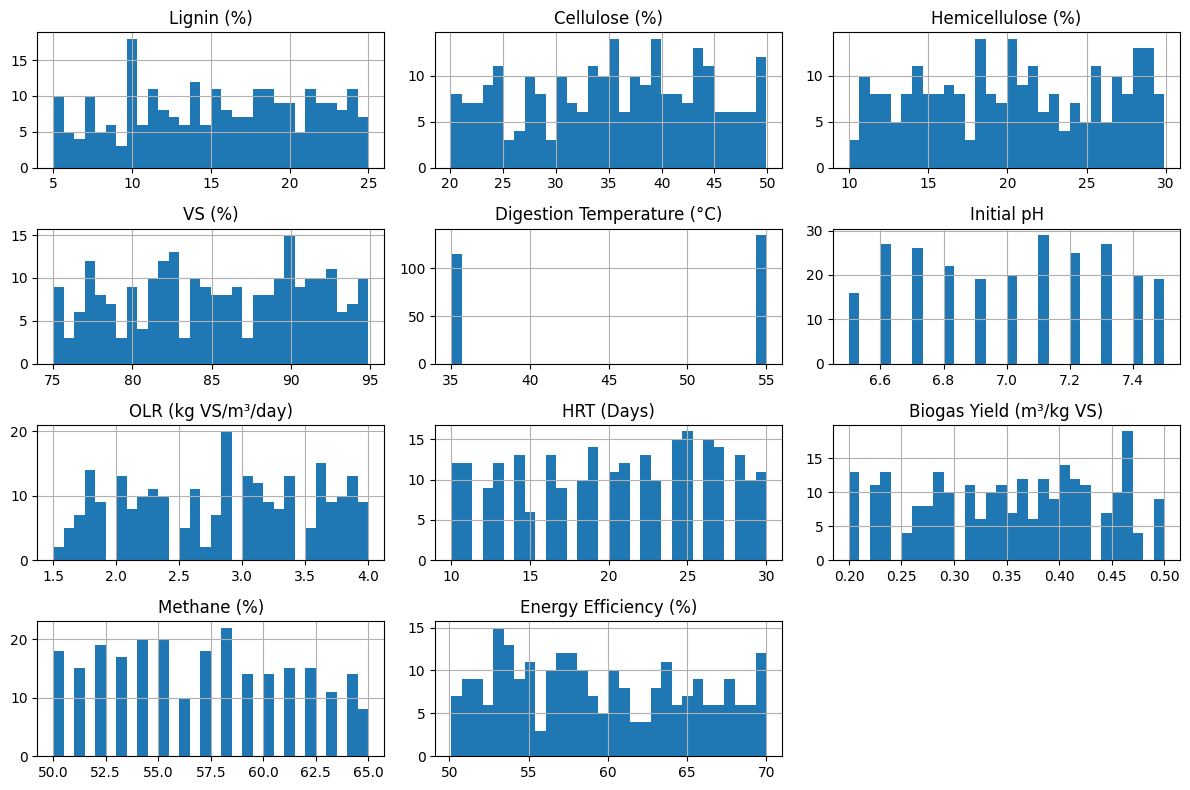

In [5]:
data.hist(figsize=(12, 8), bins=30) 
plt.tight_layout()
plt.show()

## 80/20 train/test split

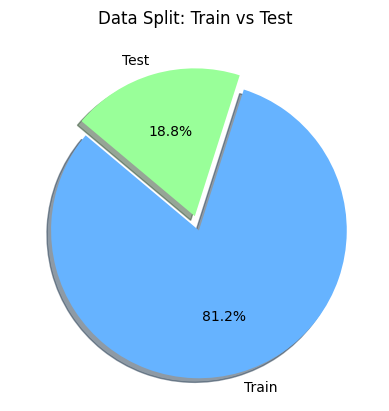

In [6]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

train_size = len(train)
test_size = len(test)

labels = ['Train', 'Test']
sizes = [train_size, test_size]
colors = ['#66b3ff','#99ff99']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Split: Train vs Test')
plt.show()

## Relationship Between Different Features and Biogas Yield

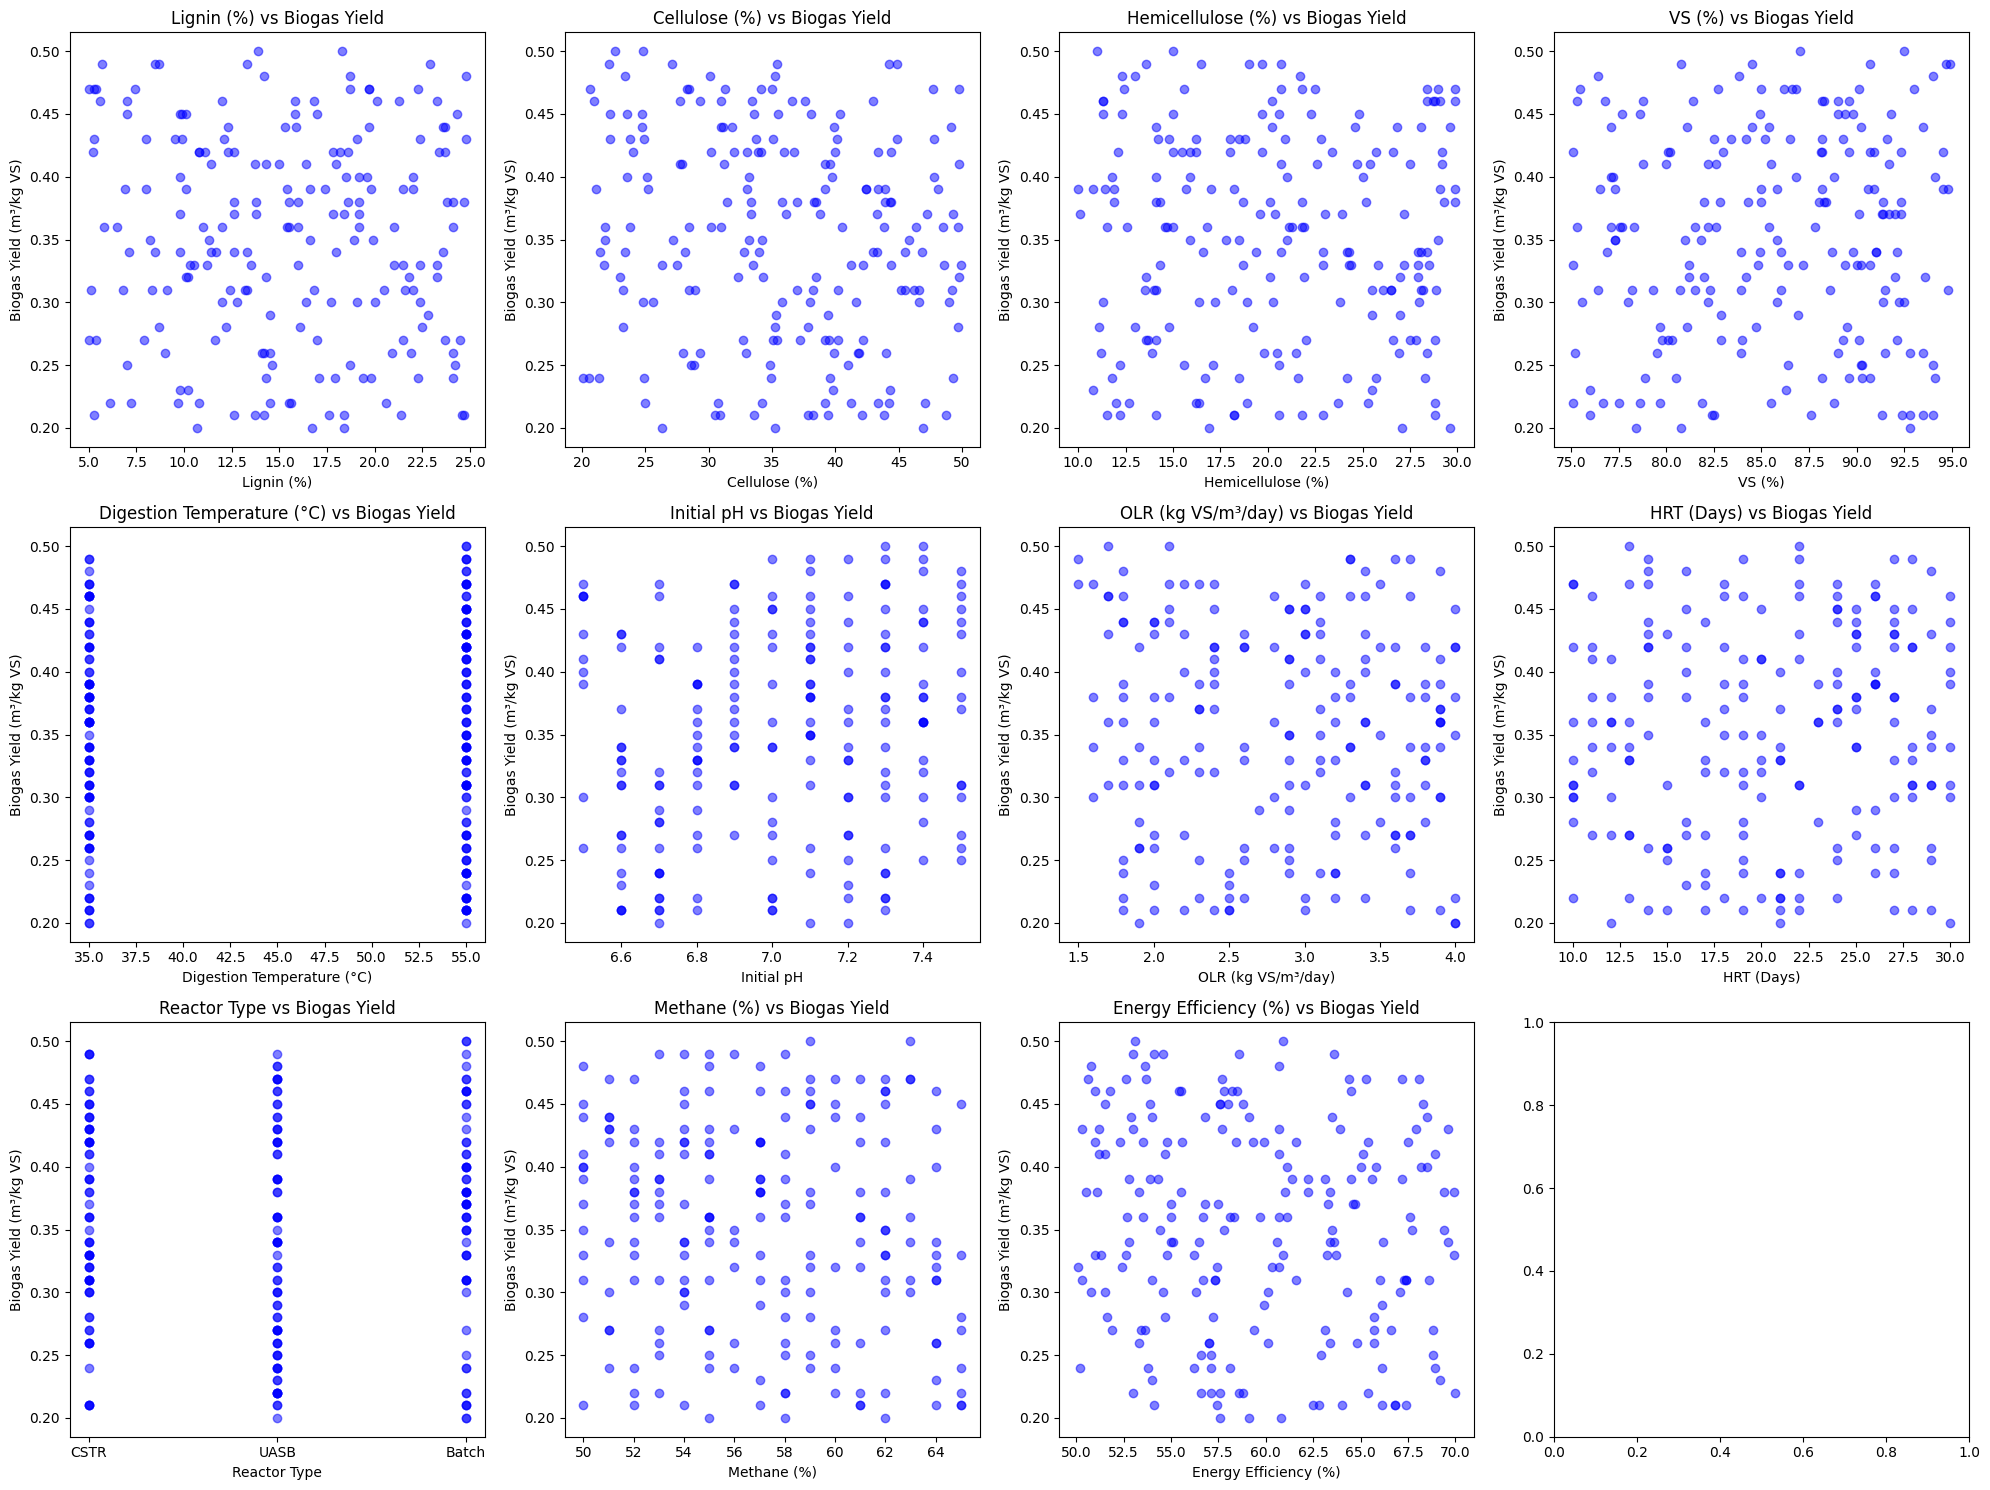

In [9]:
features = ['Lignin (%)', 'Cellulose (%)', 'Hemicellulose (%)', 'VS (%)', 'Digestion Temperature (°C)', 
            'Initial pH', 'OLR (kg VS/m³/day)', 'HRT (Days)', 'Reactor Type', 'Methane (%)', 'Energy Efficiency (%)']


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15)) 
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(train[feature], train['Biogas Yield (m³/kg VS)'], color='blue', alpha=0.5)
    axes[i].set_title(f'{feature} vs Biogas Yield')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Biogas Yield (m³/kg VS)')

plt.tight_layout() 
plt.show()

## Correlation Heatmap of Numeric Features

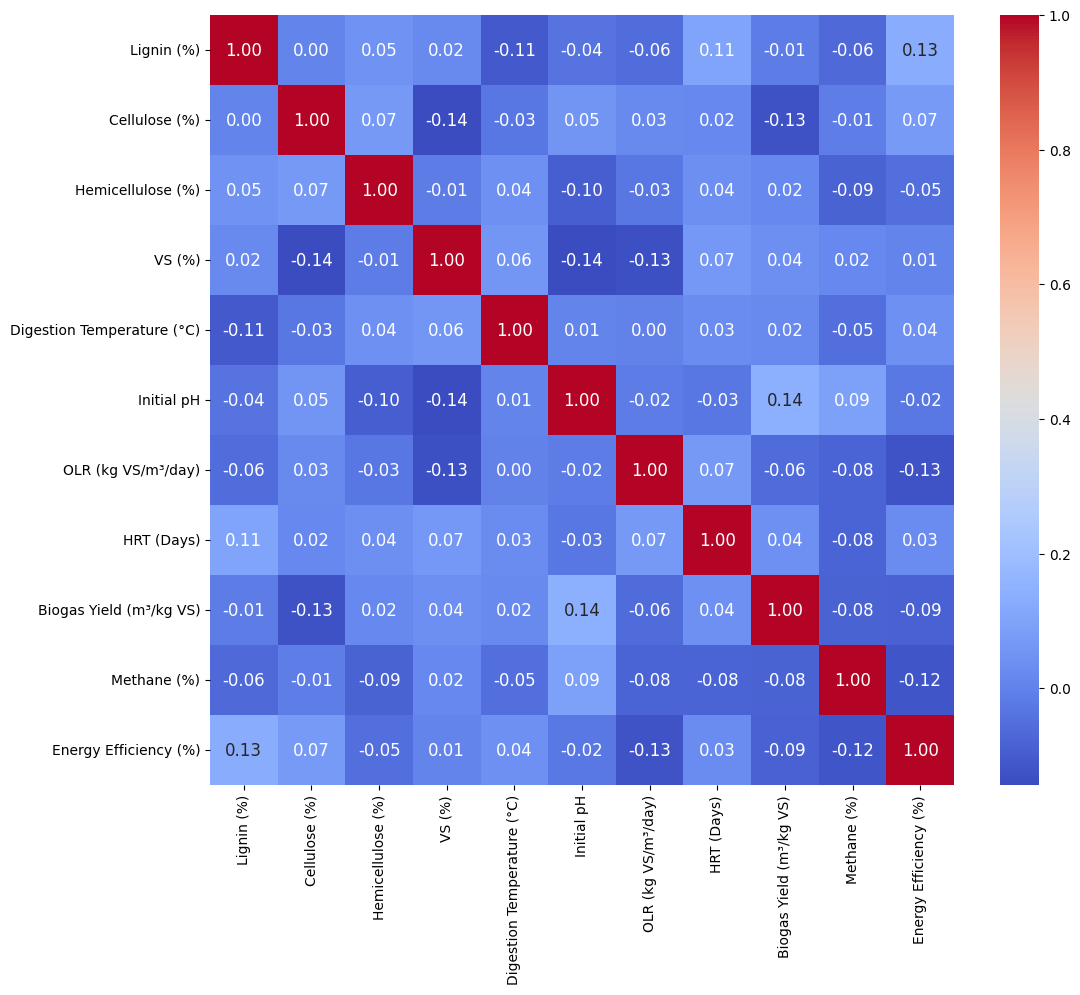

In [50]:
numeric_data = data.select_dtypes(include=[float, int])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size to make it larger
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})

plt.show()

## Linear Regression Model: Predicting Biogas Yield from Various Features

Coefficients:  [[-3.87539018e-04 -1.50146039e-03  1.57087923e-06  3.73521447e-04
  -8.57919681e-06  5.39304758e-02 -9.37586550e-03  9.86514621e-04
  -3.18248592e-03 -2.09699202e-03]]
Intercept:  [0.31373346]


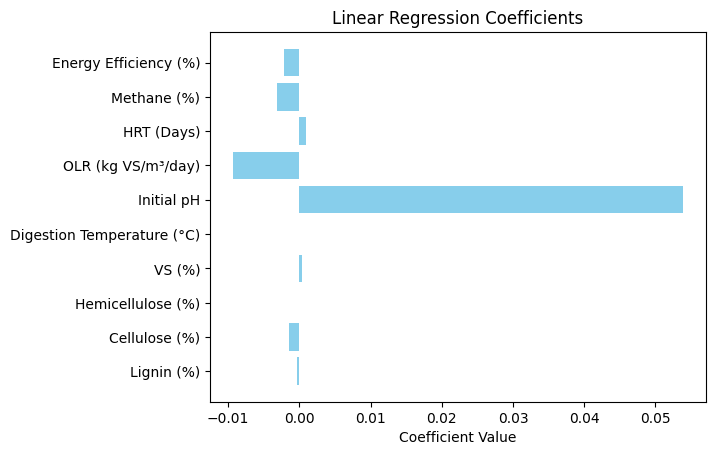

In [67]:
train_x = train[['Lignin (%)', 'Cellulose (%)', 'Hemicellulose (%)', 'VS (%)', 
                 'Digestion Temperature (°C)', 'Initial pH', 'OLR (kg VS/m³/day)', 
                 'HRT (Days)', 'Methane (%)', 'Energy Efficiency (%)']]
train_x = pd.get_dummies(train_x, drop_first=True)


train_y = train[['Biogas Yield (m³/kg VS)']]

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

coefficients = regr.coef_[0]
features = train_x.columns

plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

## Model Evaluation: R² Score on Test Data

In [70]:
test_x = test[['Lignin (%)', 'Cellulose (%)', 'Hemicellulose (%)', 'VS (%)', 
               'Digestion Temperature (°C)', 'Initial pH', 'OLR (kg VS/m³/day)', 
               'HRT (Days)', 'Methane (%)', 'Energy Efficiency (%)']]

test_x = pd.get_dummies(test_x, drop_first=True)

test_x = test_x.reindex(columns=train_x.columns, fill_value=0)

test_y = test[['Biogas Yield (m³/kg VS)']]

test_y_pred = regr.predict(test_x)

r2 = r2_score(test_y, test_y_pred)

print(f'R²: {r2}')

R²: -0.14663706630772988


## Linear Regression Model: Training with Selected Features

In [81]:
train_x_ = train[['Hemicellulose (%)', 'VS (%)', 'Initial pH', 'HRT (Days)']]

train_x_ = pd.get_dummies(train_x, drop_first=True)

train_y_ = train[['Biogas Yield (m³/kg VS)']]

regr = linear_model.LinearRegression()
regr.fit(train_x_, train_y_)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

train_y_pred = regr.predict(train_x_)

Coefficients:  [[-3.87539018e-04 -1.50146039e-03  1.57087923e-06  3.73521447e-04
  -8.57919681e-06  5.39304758e-02 -9.37586550e-03  9.86514621e-04
  -3.18248592e-03 -2.09699202e-03]]
Intercept:  [0.31373346]


## Model Evaluation: R² Score on Test Data Selected Features

In [82]:
test_x_= test[['Hemicellulose (%)', 'VS (%)', 'Initial pH', 'HRT (Days)']]

test_x_ = pd.get_dummies(test_x, drop_first=True)

test_x_ = test_x.reindex(columns=train_x.columns, fill_value=0)

test_y_ = test[['Biogas Yield (m³/kg VS)']]

test_y_pred = regr.predict(test_x_)

r2 = r2_score(test_y_, test_y_pred)

print(f'R²: {r2}')

R²: -0.14663706630772988


## Polynomial Regression Model: Predicting Biogas Yield with R² Score

R² Score (Polynomial): -0.5809379772666341


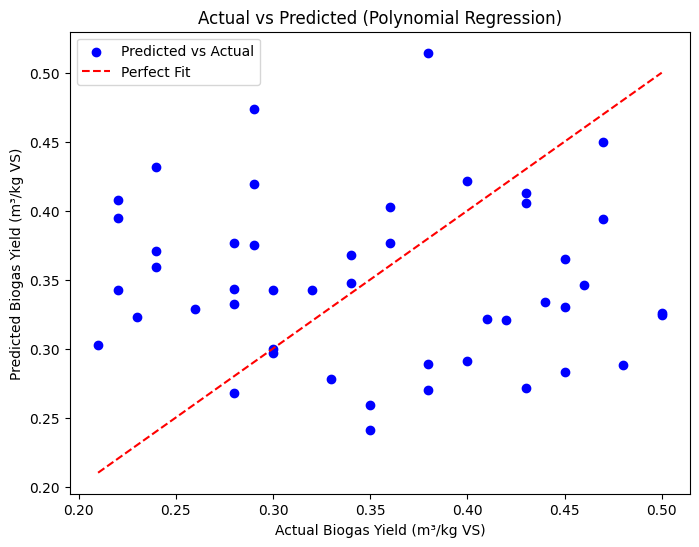

In [83]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(train_x)

model_poly = linear_model.LinearRegression()
model_poly.fit(X_poly, train_y)

X_test_poly = poly.transform(test_x)
y_pred_poly = model_poly.predict(X_test_poly)

print(f'R² Score (Polynomial): {r2_score(test_y, y_pred_poly)}')

y_pred_poly = model_poly.predict(X_test_poly)

# رسم پیش‌بینی‌ها در مقابل مقادیر واقعی
plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred_poly, color='blue', label='Predicted vs Actual')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Biogas Yield (m³/kg VS)')
plt.ylabel('Predicted Biogas Yield (m³/kg VS)')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.legend()
plt.show()

## Decision Tree Regression Model: Predicting Biogas Yield with R² Score

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(train_x, train_y)

y_pred_tree = tree_model.predict(test_x)
print(f'R² Score (Decision Tree): {r2_score(test_y, y_pred_tree)}')

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))  # تنظیم اندازه نمودار
plot_tree(tree_model, filled=True, feature_names=train_x.columns, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()

R² Score (Decision Tree): -1.0046376811594202


## Random Forest Regression Model: Predicting Biogas Yield with R² Score

In [75]:
train_y = train_y.values.ravel()
test_y = test_y.values.ravel()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_x, train_y)

y_pred_rf = rf_model.predict(test_x)

from sklearn.metrics import r2_score
print(f'R² Score (Random Forest): {r2_score(test_y, y_pred_rf)}')

R² Score (Random Forest): -0.18884084057970973


## Support Vector Machine (SVM) Regression: Predicting Biogas Yield with R² Score

In [76]:
svm_model = SVR(kernel='rbf')
svm_model.fit(train_x, train_y)

y_pred_svm = svm_model.predict(test_x)
print(f'R² Score (SVM): {r2_score(test_y, y_pred_svm)}')

R² Score (SVM): -0.07219442154414724


In [77]:
# اهمیت ویژگی‌ها در مدل رندوم فارست
X = data[['Lignin (%)', 'Cellulose (%)', 'Hemicellulose (%)', 'VS (%)', 'Digestion Temperature (°C)', 'Initial pH', 'OLR (kg VS/m³/day)', 'HRT (Days)', 'Methane (%)', 'Energy Efficiency (%)']]
y = data['Biogas Yield (m³/kg VS)']

importances = rf_model.feature_importances_
feature_names = X.columns

# مرتب‌سازی و نمایش اهمیتی که ویژگی‌ها دارند
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                      Feature  Importance
9       Energy Efficiency (%)    0.146888
1               Cellulose (%)    0.136535
3                      VS (%)    0.119292
2           Hemicellulose (%)    0.106496
5                  Initial pH    0.106487
6          OLR (kg VS/m³/day)    0.097340
8                 Methane (%)    0.097255
0                  Lignin (%)    0.093669
7                  HRT (Days)    0.082066
4  Digestion Temperature (°C)    0.013970


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# جستجو برای بهترین هایپرپارامترها برای رندوم فارست
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# نمایش بهترین هایپرپارامترها
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [79]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model with the best parameters
rf_model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model on your training data
rf_model.fit(train_x, train_y)

# Make predictions
predictions = rf_model.predict(test_x)

# Evaluate model performance
from sklearn.metrics import r2_score
r2 = r2_score(test_y, predictions)

print(f"R² Score: {r2}")

R² Score: -0.23467602248147834
